Project Objective:
- group recipes into topics
- input: prompt topic query
- output: list of recommeded recipes

EDA:
- plot histogram of num of recipes with num ingredients (issue bc list is string)
- plot histogram of num of recipes with num of lines in directions (issue bc list is string)
- plot bar graph from different sources
- plot bar graph from top words in title (word count freq)
- plot bar graph from top words in ingredients/NER (word count freq)
- wordcloud of title and ingredients

## Import packages

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import ast

In [20]:
import seaborn as sns

In [ ]:
from wordcloud import WordCloud

## Set Options

In [4]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings

In [5]:
pd.set_option('display.max_columns', None) # displays all pd columns

## Explore Full Dataset

In [6]:
dataset_full = pd.read_csv('dataset/full_dataset.csv')

In [7]:
dataset_full.shape
# over 2mil obs

(2231142, 7)

In [8]:
dataset_full.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [9]:
dataset_full.isnull().sum().sort_values(axis=0, ascending=False)
# no missing values - very good for 2mil

Unnamed: 0     0
title          0
ingredients    0
directions     0
link           0
source         0
NER            0
dtype: int64

## WordCloud Image

In [10]:
from wordcloud import WordCloud

def minimal_wordcloud(df, column):
    """
    Generate a simple wordcloud with words most commonly seen
    """
    text = str(df[column].values)
    wordcloud = WordCloud().generate(text)
    image = wordcloud.to_image()
    return image

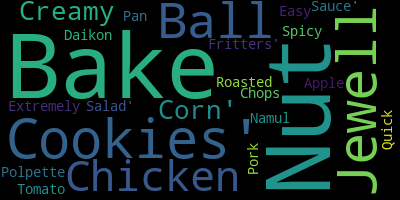

In [11]:
# word cloud for 'title'
minimal_wordcloud(dataset_full,'title')

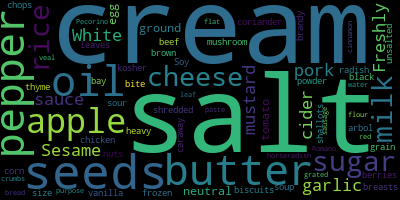

In [12]:
# word cloud for 'NER'
minimal_wordcloud(dataset_full,'NER')

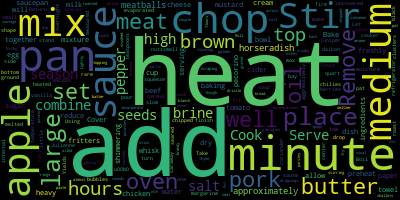

In [14]:
# word cloud for 'directions'
minimal_wordcloud(dataset_full,'directions')

## Plot of Source

[Text(0.5, 0, 'Source'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Count of Recipes from Each Source')]

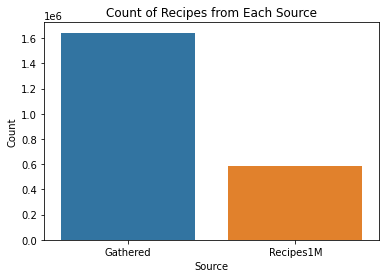

In [21]:
g1 = sns.countplot(x="source", data=dataset_full)
g1.set(xlabel="Source", ylabel="Count", title="Count of Recipes from Each Source")

## Feature Engineer and Plot Length of Directions

In [38]:
import ast

In [64]:
df_directions = pd.DataFrame()

In [65]:
df_directions['directions'] = dataset_full['directions']

In [67]:
df_directions['directions'] = df_directions['directions'].apply(ast.literal_eval)

In [70]:
df_directions['len_dir'] = [len(x) for x in df_directions['directions']]

In [73]:
df_directions.iloc[0]

directions    [In a heavy 2-quart saucepan, mix brown sugar,...
len_dir                                                       6
Name: 0, dtype: object

In [85]:
df_directions.len_dir.value_counts()

4      271221
3      262609
5      255990
6      215570
2      191635
        ...  
148         1
125         1
110         1
164         1
151         1
Name: len_dir, Length: 127, dtype: int64

[Text(0.5, 0, 'Number of Lines of Direction'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Distribution of Number of Lines in Directions')]

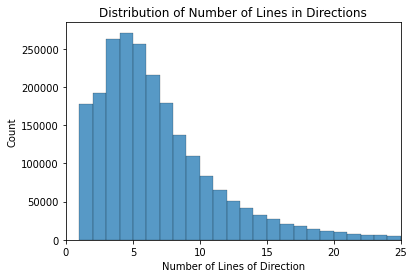

In [100]:
g1 = sns.histplot(x="len_dir", data=df_directions, binwidth=1)
g1.set_xlim(0, 25)
g1.set(xlabel="Number of Lines of Direction", ylabel="Count", title="Distribution of Number of Lines in Directions")

## Feature Engineer and Plot Length of Ingredients(NER)

In [105]:
df_NER = pd.DataFrame()

In [106]:
df_NER['NER'] = dataset_full['NER']

In [107]:
df_NER['NER'] = df_NER['NER'].apply(ast.literal_eval)

In [108]:
df_NER['len_NER'] = [len(x) for x in df_NER['NER']]

In [109]:
df_NER.len_NER.value_counts()

7      267449
6      258458
8      251438
9      218311
5      213330
        ...  
64          1
73          1
81          1
276         1
59          1
Name: len_NER, Length: 78, dtype: int64

[Text(0.5, 0, 'Number of Ingredients'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Distribution of Number of Ingredients')]

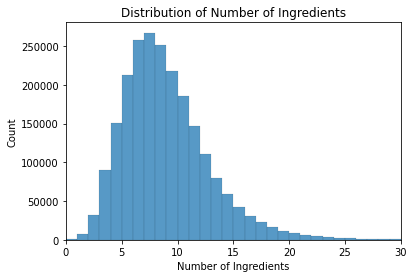

In [117]:
g1 = sns.histplot(x="len_NER", data=df_NER, binwidth=1)
g1.set_xlim(0, 30)
g1.set(xlabel="Number of Ingredients", ylabel="Count", title="Distribution of Number of Ingredients")